# JSC270 Assignment 1: Change in Global Life Expectancy and Possible Correlating Factors {-}


## Shirley Wang, 1003946509 {-}
## Feb 8 2019 {-}


# Introduction 

In this report, we will investigate if global life expectancy has changed between 2013 and 2018, and if there are specific factors that are associated with these results.  We are using the CIA Factbook data available on the CIA Factbook website in this report.  We will answer these questions:

## Questions 

1. Has global life expectancy at birth changed between 2013 to 2018? Which continents and countries have experienced the least and greatest changes?
2. Use data from the 2013 and 2018 World Factbook to investigate if a countries' health expenditures and carbon dioxide emissions from consumption of energy are associated with life expectancy at birth. Create categorical variables using health expenditures and carbon dioxide emissions. Do your results change?
3. Answer 2, except this time choose two other variables (i.e., not health expenditure or carbon dioxide emissions) from the CIA World Factbook to investigate if these variables are associated with life expectancy at birth. We will use Infant Mortality and External Debt.

# Method

We will use the data from the CIA Factbook website detailing Life Expectancy at Birth in the years 2013 and 2018.  We will also be looking at the variables: Health Expenditures, CO2 Emissions, Infant Mortality, and External Debt.  

## Question 1

We will analyze if global life expectancy at birth has changed between 2013 and 2018 by creating a new variable that represents the difference in life expectancy from 2013 to 2018, then observe its distribution and see if it's majority is significantly different from zero.  We will also plot the differences in every continent, to see if the distribution differs from region to region.

## Question 2

We will investigate if health expenditures and CO2 emissions are associated with life expectancy at birth by observing the scatterplot of these variables and the corresponding regression line.  Then we will create categorical variables corresponding to health expenditures and CO2 emissions, by splitting the variable into the categories 'high' and 'low', where values that are 'high' are above the median of all values in that dataset, and 'low' if below the median.  Then we will observe the distribution of life expectancy in each category.

## Question 3

We will investigate if infant mortality and external debt are associated with life expectancy at birth by observing the scatterplot of these variables and the corresponding regression line.  Then we will create categorical variables corresponding to these variables by splitting the variable into the categories 'high' and 'low', where values that are 'high' are above the median of all values in that dataset, and 'low' if below the median.  Then we will observe the distribution of life expectancy in each category.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# code for regions data
from bs4 import BeautifulSoup
import numpy as np
from urllib.request import urlopen

webpage = 'https://www.cia.gov/library/publications/resources/the-world-factbook/geos/xx.html'
page = urlopen(webpage)
soup = BeautifulSoup(page, 'html.parser')

regiondata=soup.select('p')
regiondata = [m.get_text() for m in regiondata]
regiondata = regiondata[14:20]

# clean data
regionsdata = [m.split(',') for m in regiondata]
for region in regionsdata:
    region[0] = region[0].split(':')[len(region[0].split(':')) - 1]
    for i in range(len(region)):
        region[i] = region[i].split("*")[0]
        region[i] = region[i].split(";")[0]
        region[i] = region[i].split("(")[0]
        region[i] = region[i].strip()
        
regionkeys = ["Africa", "Europe", "Asia", "North America", "Oceania", "South America"]
regionsdict = {regionkeys[0]: regionsdata[0], regionkeys[1]: regionsdata[1],
               regionkeys[2]: regionsdata[2], regionkeys[3]: regionsdata[3],
               regionkeys[4]: regionsdata[4], regionkeys[5]: regionsdata[5]}

# return the continent the country is in
def continent(country):
    for region in regionsdict:
        if country in regionsdict[region]:
            return region
    return np.nan

### 2013 Dataframe

In [3]:
def toNumbersVariables(data):
# change CO2 Emissions and External Debt to integers
    data['CO2 Emissions'] = (data['CO2 Emissions'].fillna(-1)
                                         .replace(',', '', regex = True)
                                         .replace('a', '', regex = True)
                                         .astype(float))
    data['External Debt'] = (data['External Debt'].fillna(-1)
                                         .replace('\$', '', regex = True)
                                         .replace(',', '', regex = True)
                                         .astype(int))
    return data.replace(-1, np.nan)

def addRegions(data):
    # add regions to dataframe
    data["Continent"] = [continent(country) for country in data["Country"]]


In [4]:
from zipfile import ZipFile
import pandas as pd
import os
from io import BytesIO

# display dataframes nicely
pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_

In [5]:
# code for 2013 dataframe

# 2013 factbook life expectency 
resp = urlopen("https://www.cia.gov/library/publications/download/download-2013/factbook.zip")
with ZipFile(BytesIO(resp.read())) as myzip:
    with open('rawdata_20011.txt', 'wb') as f:
        f.write(myzip.read('factbook/rankorder/rawdata_2102.txt'))

dat2013 = pd.read_csv('rawdata_20011.txt', header = None, sep = "\t", skipinitialspace = True)
dat2013 = dat2013[[1, 2]]
dat2013 = dat2013.rename(columns = {1: "Country", 2: "Life Expectancy at Birth"})
dat2013.head()

# other variables
othervariables = [["Health Expenditures", "rawdata_2225.txt"], 
                  ["CO2 Emissions", "rawdata_2254.txt"], 
                  ["Infant Mortality", "rawdata_2091.txt"], 
                  ["External Debt", "rawdata_2079.txt"]]

# put other variables in dataframe
for variable in othervariables:
    resp = urlopen("https://www.cia.gov/library/publications/download/download-2013/factbook.zip")
    with ZipFile(BytesIO(resp.read())) as myzip:
        with open('rawdata_20011.txt', 'wb') as f:
            f.write(myzip.read('factbook/rankorder/' + variable[1]))
    data = pd.read_csv('rawdata_20011.txt', header = None, sep = "\t", skipinitialspace = True)
    data = data[[1, 2]]
    data = data.rename(columns = {1: "Country", 2: variable[0]})
    dat2013 = dat2013.merge(data, how="outer", on="Country")
    
dat2013 = toNumbersVariables(dat2013)
addRegions(dat2013)

In [6]:
dat2013.head()[["Country", "Life Expectancy at Birth", 
                "Health Expenditures", "CO2 Emissions"]]

,Country,Life Expectancy at Birth,Health Expenditures,CO2 Emissions
0,Monaco,89.63,4.3,NaN
1,Macau,84.46,NaN,1.805000e+06
2,Japan,84.19,9.3,1.181000e+09
3,Singapore,84.07,4.6,2.124000e+08
4,San Marino,83.12,7.2,NaN


In [7]:
dat2013.head()[["Infant Mortality", "External Debt", "Continent"]]

,Infant Mortality,External Debt,Continent
0,1.81,NaN,Europe
1,3.15,0.000000e+00,NaN
2,2.17,3.024000e+12,Asia
3,2.59,1.174000e+12,Asia
4,4.58,NaN,Europe


### 2018 Dataframe

In [8]:
# code for 2018 data
# NOTE: takes around 4-5 minutes to run

# 2018 factbook life expectency 
resp = urlopen("https://www.cia.gov/library/publications/download/download-2018/factbook.zip")
with ZipFile(BytesIO(resp.read())) as myzip:
    with open('rawdata_20011.txt', 'wb') as f:
        f.write(myzip.read('fields/rawdata_355.txt'))

dat2018 = pd.read_fwf('rawdata_20011.txt', header = None, delim_whitespace = True)
dat2018 = dat2018.iloc[2:,]
dat2018 = dat2018[[1, 3]]
dat2018 = dat2018.rename(columns = {1: "Country", 3: "Life Expectancy at Birth"})
dat2018["Country"] = [country.strip() for country in dat2018["Country"]]

# other variables
othervariables = [["Health Expenditures", "rawdata_358.txt", 2],
                  ["CO2 Emissions", "rawdata_274.txt", 4], 
                  ["Infant Mortality", "rawdata_354.txt", 2], 
                  ["External Debt", "rawdata_246.txt", 3]]

# put other variables in dataframe
for variable in othervariables:
    resp = urlopen("https://www.cia.gov/library/publications/download/download-2018/factbook.zip")
    with ZipFile(BytesIO(resp.read())) as myzip:
        with open('rawdata_20011.txt', 'wb') as f:
            f.write(myzip.read('fields/' + variable[1]))
    data = pd.read_fwf('rawdata_20011.txt', header = None, delim_whitespace = True)
    data = data.iloc[2:,]
    data = data[[1, variable[2]]]
    data = data.rename(columns = {1: "Country", variable[2]: variable[0]})
    data["Country"] = [country.strip() for country in data["Country"]]
    dat2018 = dat2018.merge(data, how="outer", on="Country")
    
dat2018 = toNumbersVariables(dat2018)
addRegions(dat2018)

In [9]:
dat2018.head()[["Country", "Life Expectancy at Birth", 
                "Health Expenditures", "CO2 Emissions"]]

,Country,Life Expectancy at Birth,Health Expenditures,CO2 Emissions
0,Monaco,89.4,4.3,NaN
1,Japan,85.5,10.2,1.268000e+09
2,Singapore,85.5,4.9,2.495000e+08
3,Macau,84.6,NaN,2.563000e+06
4,San Marino,83.4,6.1,NaN


In [10]:
dat2018.head()[["Infant Mortality", "External Debt", "Continent"]]

,Infant Mortality,External Debt,Continent
0,1.8,NaN,Europe
1,2.0,3.240000e+12,Asia
2,2.3,5.661000e+11,Asia
3,3.1,0.000000e+00,NaN
4,4.3,NaN,Europe


## Exploring the Data

There are a number of missing values for each variable in both dataframes.  As well, there are 16 more countries in the 2018 dataset, but also more missing values overall for it. 

## Change in Life Expectancy Data

In [11]:
# code for question 1
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# make new dataset of countries that have both 2013 and 2018, and also a difference column.
sns.set()
lifeexpdat = dat2013.merge(dat2018, on="Country", how="outer")
lifeexpdat = lifeexpdat[["Country", "Life Expectancy at Birth_x", 
                         "Life Expectancy at Birth_y", "Continent_x", "Continent_y"]]
lifeexpdat = lifeexpdat.rename(columns = {"Life Expectancy at Birth_x": "Life Expectancy 2013", 
                                          "Life Expectancy at Birth_y": "Life Expectancy 2018"})

continents = []
for i in range(249):
    if lifeexpdat.loc[i, 'Continent_x'] == np.nan:
        continents.append(lifeexpdat.loc[i, 'Continent_y'])
    else:
        continents.append(lifeexpdat.loc[i, 'Continent_x'])
lifeexpdat["Continent"] = continents
lifeexpdat = lifeexpdat.drop(columns = ["Continent_x", "Continent_y"])
lifeexpdat = lifeexpdat.dropna(subset = ["Life Expectancy 2013", "Life Expectancy 2018"])
lifeexpdat["Change"] = lifeexpdat["Life Expectancy 2018"] - lifeexpdat["Life Expectancy 2013"]

lifeexpdat.head()

,Country,Life Expectancy 2013,Life Expectancy 2018,Continent,Change
0,Monaco,89.63,89.4,Europe,-0.23
1,Macau,84.46,84.6,NaN,0.14
2,Japan,84.19,85.5,Asia,1.31
3,Singapore,84.07,85.5,Asia,1.43
4,San Marino,83.12,83.4,Europe,0.28


## Question 1 Graphs

### Figure 1.1

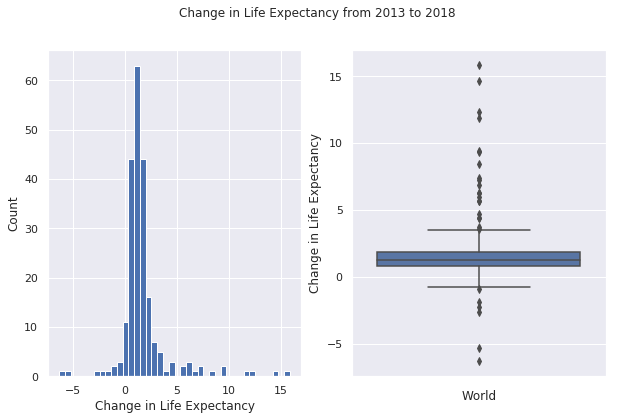

In [12]:
# graph histogram of differences
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].hist(lifeexpdat["Change"], bins = 40)
plt.suptitle("Change in Life Expectancy from 2013 to 2018")
axs[0].set_xlabel("Change in Life Expectancy")
axs[0].set_ylabel("Count")

sns.boxplot(y = "Change", data = lifeexpdat, ax = axs[1])
axs[1].set_ylabel("Change in Life Expectancy")
axs[1].set_xlabel("World")
plt.show()

### Figure 1.2

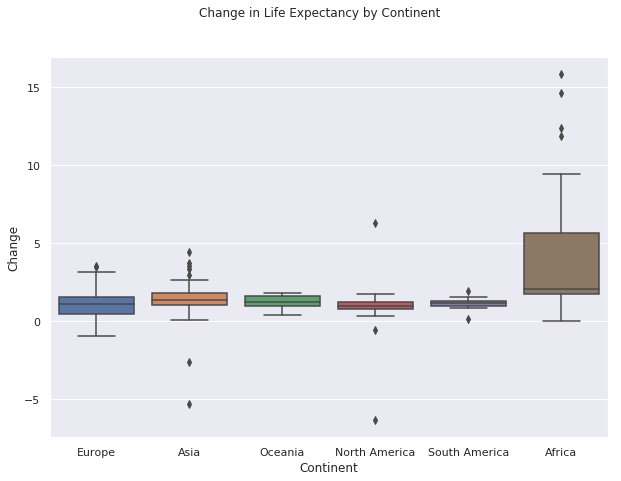

In [13]:
# graph histogram of differences for each continent
fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharey=True, sharex=True)
fig.suptitle("Change in Life Expectancy by Continent")
sns.boxplot(x="Continent", y = "Change", data = lifeexpdat, ax = axs)
plt.show()

### Figure 1.3

In [14]:
# largest changes in life expectancy
lifeexpdat[lifeexpdat["Change"] > 10]

,Country,Life Expectancy 2013,Life Expectancy 2018,Continent,Change
213,Gabon,52.15,68.0,Africa,15.85
214,Namibia,52.03,64.4,Africa,12.37
220,Guinea-Bissau,49.50,61.4,Africa,11.90
221,South Africa,49.48,64.1,Africa,14.62


### Figure 1.4

In [15]:
# smallest changes in life expectancy
lifeexpdat[lifeexpdat["Change"] < -5]

,Country,Life Expectancy 2013,Life Expectancy 2018,Continent,Change
28,Jordan,80.30,75.0,Asia,-5.30
61,Dominican Republic,77.62,71.3,North America,-6.32


In [16]:
# Graph functions

def scatterboth(var):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
    fig.suptitle("Life Expectancy vs " + var)
    sns.regplot(x = 'Life Expectancy at Birth', y = var, data = dat2013, ax = axs[0])
    axs[0].set_xlabel("Life Expectancy at Birth")
    axs[0].set_ylabel(var)
    axs[0].set_title("2013")

    sns.regplot(x = 'Life Expectancy at Birth', y = var, data = dat2018, ax = axs[1])
    axs[1].set_xlabel("Life Expectancy at Birth")
    axs[1].set_title("2018")

    plt.show()
    
def boxplotboth(var):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True)
    fig.suptitle("Life Expenditures by " + var + " Category")
    sns.boxplot(x=var, y = "Life Expectancy at Birth", 
                order = ["low", "high"], data = dat2013cat, ax = axs[0])

    axs[0].set_title("2013")

    sns.boxplot(x=var, y = "Life Expectancy at Birth", 
                order = ["low", "high"], data = dat2018cat, ax = axs[1])
    axs[1].set_xlabel(var)
    axs[1].set_title("2018")
    plt.show()

## Question 2 Graphs

### Figure 2.1

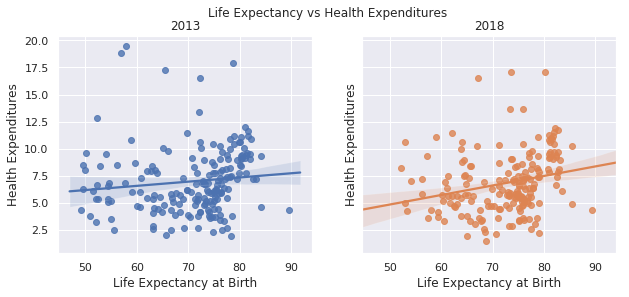

In [17]:
# code for question 2

# scatterplot of health expenditures vs life expectancy in 2013 and 2018
scatterboth("Health Expenditures")

### Figure 2.2

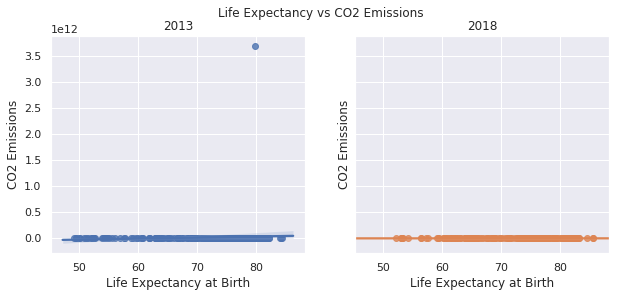

In [18]:
# scatterplot of co2 emissions vs life expectancy in 2013 and 2018
scatterboth("CO2 Emissions")

We appear to have an outlier in the 2013 dataset.  Investigating this further:

In [19]:
# find outlier

dat2013.loc[dat2013['CO2 Emissions'] == 3.7*10**(12)][["Country", "CO2 Emissions"]]

,Country,CO2 Emissions
36,European Union,3.700000e+12


The European Union is not a country, it's a union of European countries.  Then there are two possibilities.  One, the CO2 Emissions here is actually the sum of all CO2 emissions of all the European countries.  Two, this is a typo.  Either way, since the European Union is technically not a country, we should be fine excluding it from our analysis.

### Figure 2.3

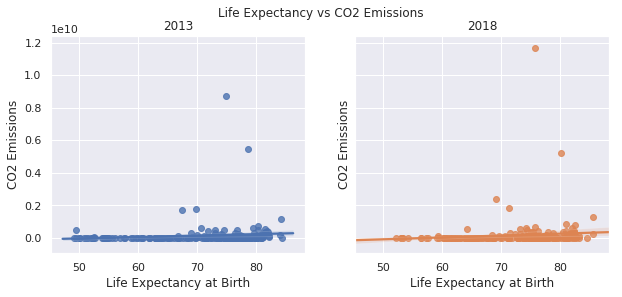

In [20]:
dat2013out = dat2013.drop(36)

# scatterplot of co2 emissions vs life expectancy in 2013 and 2018
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True)
fig.suptitle("Life Expectancy vs CO2 Emissions")
sns.regplot(x=dat2013out['Life Expectancy at Birth'], y=dat2013out["CO2 Emissions"], ax = axs[0])
axs[0].set_xlabel("Life Expectancy at Birth")
axs[0].set_ylabel("CO2 Emissions")
axs[0].set_title("2013")

sns.regplot(x=dat2018['Life Expectancy at Birth'], y=dat2018["CO2 Emissions"], ax = axs[1])
axs[1].set_xlabel("Life Expectancy at Birth")
axs[1].set_title("2018")

plt.show()

In [21]:
def createCatVar(var, data, datacat):
    datacat[var] = ["low" if x <= data[var].quantile(0.5) 
                          else "high" 
                          for x in data[var]]

In [22]:
# create dataframe with new categorical variables
dat2013cat = dat2013[["Country", "Life Expectancy at Birth", "Continent"]]

createCatVar("Health Expenditures", dat2013, dat2013cat)
createCatVar("CO2 Emissions", dat2013, dat2013cat)

dat2018cat = dat2018[["Country", "Life Expectancy at Birth", "Continent"]]

createCatVar("Health Expenditures", dat2018, dat2018cat)
createCatVar("CO2 Emissions", dat2018, dat2018cat)

### Figure 2.4

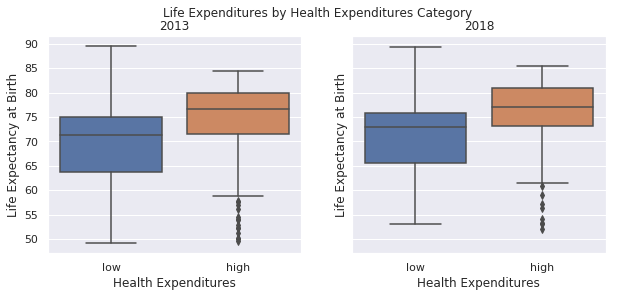

In [23]:
# boxplot of categories of health expenditures for life expectancy in 2013 and 2018
boxplotboth("Health Expenditures")

### Figure 2.5

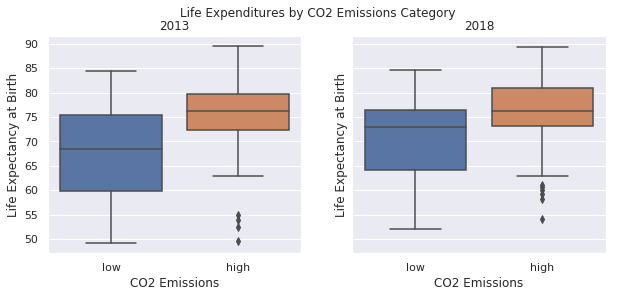

In [24]:
# boxplot of categories of co2 emissions for life expectancy in 2013 and 2018
boxplotboth("CO2 Emissions")

## Question 3 Graphs

### Figure 3.1

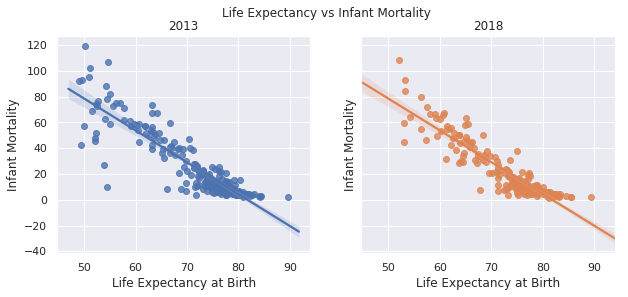

In [25]:
# code for question 3

# scatterplot of infant mortality vs life expectancy in 2013 and 2018
scatterboth("Infant Mortality")

### Figure 3.2

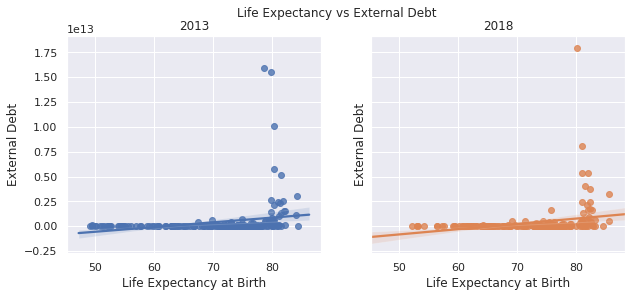

In [26]:
# scatterplot of external debt vs life expectancy in 2013 and 2018
scatterboth("External Debt")

In [27]:
# create dataframe with new categorical variables

createCatVar("Infant Mortality", dat2013, dat2013cat)
createCatVar("External Debt", dat2013, dat2013cat)

createCatVar("Infant Mortality", dat2018, dat2018cat)
createCatVar("External Debt", dat2018, dat2018cat)

### Figure 3.3

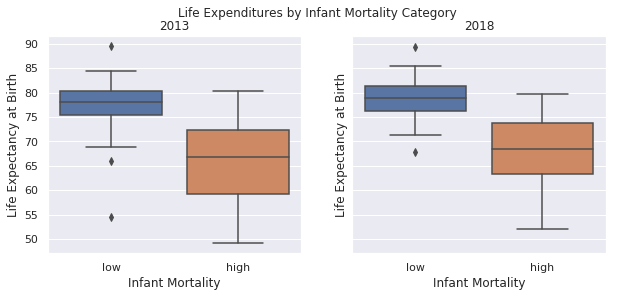

In [28]:
# boxplot of categories of infant mortality for life expectancy in 2013 and 2018
boxplotboth("Infant Mortality")

### Figure 3.4

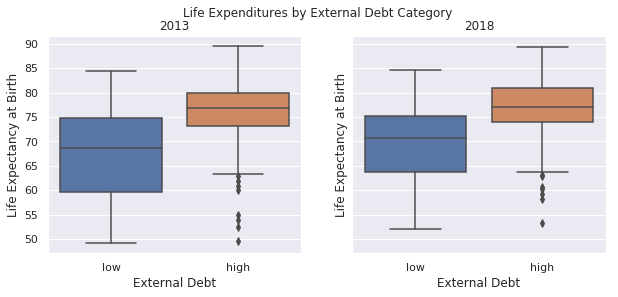

In [29]:
# boxplot of categories of external debt for life expectancy in 2013 and 2018
boxplotboth("External Debt")

# Results

## Question 1

From Figure 1.1, looking at the histogram, we can see that the mode of values is above zero, and the distribution is slightly skewed right.  Looking at the boxplot, the interquartile range of the boxplot is entirely above zero, meaning at least 75% of countries had a positive change in life expectancy.  This is significantly different from zero.  Both of these graphs imply that global life expectancy at birth has slightly increased from 2013 to 2018.


From Figure 1.2, the boxplot of changes in life expectancy for each continent, we can see that Africa had overall the largest positive changes in life expectancy, with all its countries having a positive life expectancy and many having very large changes.  Europe has the lowest overall change in life expectancy, with a very low median and whiskers that expended below 0. But Asia and North America had the countries that experienced the largest negative change in life expectancy.  


From Figure 1.3 and 1.4, looking at the extreme data values, the countries with the largest positive and negative changes also originate from the continents that experienced these large changes, with the largest positive change in Gabon in Africa at 15.85 years and the largest negative change in the Dominican Republic in North America at -6.32 years.  

## Question 2

From Figure 2.1, looking at the scatterplot of Health Expenditures vs Life Expectancy, for 2013, it appears that there might be a positive correlation between Life Expectancy and Health Expenditures.  However, the confidence interval around the regression line also has the possibility of being horizontal, so we can't be sure.  For 2018, a positive correlation seems more obvious and probable, since the confidence interval doesn't include the possibility of the regression line being horizontal.


From Figure 2.4, looking at Health Expenditures from the perspective of the categories high and low, for 2013, the median of the high category is higher than the low, as well as skinner.  Its median is higher than the low category, however the low category's distribution is more spread out than the high.  Since the low category's distribution is wide enough to cover all the high values, we still can't make any conclusions here.  For 2018, it has the same problem, where the high category's interquartile range is somewhat higher than the low category's, but the range of the low category also covers the range of the high category.


From Figure 2,2, looking at the scatterplot of CO2 Emissions vs Life Expectancy, for 2013, it appears that there might be a positive correlation between Life Expectancy and CO2 Emissions, although the few countries with very high values makes it hard to be sure.  For 2018, the same holds. There appears to be a positive correlation, although the positive slope in the regression line might be due to the very high outliers.


From Figure 2.5, looking at CO2 Emissions from the perspective of the categories high and low, for 2013, since the boxplot's entire distribution of the CO2 Emissions high category is shifted higher than the low category, it does seem that countries with high CO2 emissions also have higher life expectancy at birth.  For 2018, the same holds.  So there is some evidence that there is a positive correlation between CO2 Emissions and life expectancy at birth.

## Question 3

From 3.1, looking at the scatterplot of Infant Mortality vs Life Expectancy, for 2013, we have a clear negative correlation between them. The regression line is clearly negatively sloped with a small confidence interval.  For 2018, the confidence interval is even narrower, so still have its clear negative correlation.


From 3.3, looking at Infant Mortality from the perspective of the categories high and low, for 2013, we see more support for the idea that infant mortality and life expectancy are negatively correlated, since the interquartile range of the high infant mortality category is entirely below the low infant mortality category.  For 2018, the same is true. 


From 3.2, looking at the scatterplot of External Debt vs Life Expectancy, for 2013, there appears to be a positive correlation between them.  Even the very high values occur with high life expectancies, so we can't be sure that they're typos.  For 2018, the same holds.  There appears to be a positive correlation, but it could be due to the very high positive outliers affecting the regression line's slope.


From 3.4, looking at External Debt from the perspective of the categories high and low, for 2013, we see support for the idea that there is a positive correlation between external debt and life expectancy, since the distribution of the high category is clustered higher than majority of the low category.  But there is still a lot of overlap between the two distributions, and lots of low value outliers in the high category that would be explained if there was no difference in the two categories, so we can't be sure. For 2018, we get the same result.

# Conclusion 

We conclude that global life expectancy at birth has experienced a positive change from 2013 to 2018, since the distribution of the change in life expectancy is significantly above zero.  


Africa had the overall largest positive changes in life expectancy, and Europe had the overall smallest change in life expectancy, but there were certain countries in North America and Asia that had very large negative changes in life expectancy, but those could be considered outliers, since the other countries in these continents all experienced a small positive change.  The countries with the largest positive and negative changes also originate from these continents respectively, with the largest positive change in Gabon in Africa at 15.85 years and the largest negative change in the Dominican Republic in North America at -6.32 years.  Interestingly, the countries that experienced the largest positive changes in life expectancy all originally had low life expectancies.  This could be a sign that living conditions are steadily improving in poorer countries.


For Health Expenditures, the regression line and boxplots suggest a possible positive correlation, but it isn't very strong. We conclude that there is some evidence suggesting that Health Expenditures could be positively correlated with life expectancy, but we can't make a solid conclusion about it.  We can think of this result as possibly being the related to countries with free healthcare and countries without.  Investigating if countries with public healthcare systems spend more or less on health expenditures, and if that in turn affects life expectancy if healthcare is available to all is something that could be studied in the future.


For CO2 Emissions, the regression line and boxplots suggest a positive correlation.  We conclude that there is evidence suggesting that CO2 Emissions and life expectancy are positively correlated.  For CO2 Emissions in the scatter plot, we see a general positive trend, and very high outliers for countries with high life expectancy.  This could be related to GDP, where countries with high GDP and manufactures lots of things as a result have better living conditions and higher CO2 Emissions.


For Infant Mortality, the regression line and boxplots suggest a strong negative correlation.  We conclude that there is very strong evidence suggesting that Infant Mortality and life expectancy are negatively correlated.  This makes sense, since countries whose healthcare allows less babies to die at childbirth in turn have better healthcare overall, and people probably live longer with better healthcare.


For External Debt, the regression line and boxplots suggest a positive correlation. We conclude that there is evidence suggesting a positive correlation between External Debt and life expectancy.  This might be due to countries that have higher GDP will have a higher external debt, and since there is more money more can be invested into better healthcare.  This could be something to investigate in the future.


Our data is entirely dependent on the accuracy of the CIA Factbook.  The factbook tries its best to update with each year, but for some countries it has missing values, and for some countries it can't properly update the values every year, so they might be outdated.  This could have lead to mistakes in our analysis.